In [81]:
## Imports
import numpy

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import scipy.io
import cv2
print(sklearn.__version__)
print(tf.__version__)

0.22.2.post1
2.4.1


Shape:  (32, 32, 3, 1000)
Data has been imported Successfully.


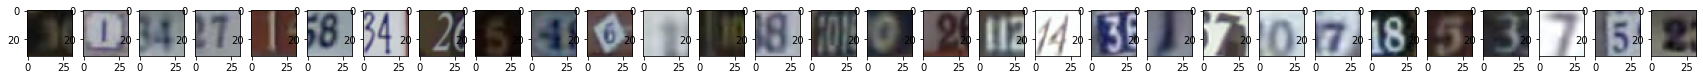

In [82]:
## Load Data
Q1_train = scipy.io.loadmat('./Data/Q1/q1_train.mat')
Q1_test = scipy.io.loadmat('./Data/Q1/q1_test.mat')
x_train = Q1_train["train_X"].astype('float32') /255.0
y_train =  Q1_train["train_Y"]
x_test = Q1_test["test_X"].astype('float32') /255.0
y_test =  Q1_test["test_Y"]
##

y_train = y_train -1
y_test = y_test -1

print("Shape: ", x_train.shape)
print("Data has been imported Successfully.")

# Print Images
fig = plt.figure(figsize=[50,50])
for i in range(30):
    ax = fig.add_subplot(50, 50, i + 1)
    ax.imshow(x_train[:,:,:,i])

In [83]:
## Basic Model
def basicModel():
    inputs = keras.Input(shape=(32, 32, 3, ), name='img')
    ## First Conv Block
    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Second Conv Block
    x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Third Conv Block
    x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Add Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    ##x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    simpleVGG = keras.Model(inputs=inputs, outputs=outputs, name='simpleVGG')
    return simpleVGG

In [84]:
def basicModel2():
    inputs = keras.Input(shape=(32, 32, 3, ), name='img')
    ## First Conv Block
    x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.relu)(x)
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Second Conv Block
    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.relu)(x)
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Third Conv Block
    x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activations.relu)(x)
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

    ## Add Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    simpleVGG = keras.Model(inputs=inputs, outputs=outputs, name='simpleVGG')
    return simpleVGG

In [85]:
## Plot training and evlauation (Ripped from examples)
def plot_training(history, model, x_test, y_test):
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 3, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 3, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()
    
    pred = model.predict(x_test)
    indexes = tf.argmax(pred, axis=1)
    i = tf.cast([], tf.int32)
    indexes = tf.gather_nd(indexes, i)
    
    cm = confusion_matrix(y_test, indexes)
    ax = fig.add_subplot(1, 3, 3)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)

Model: "simpleVGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 32)          0 

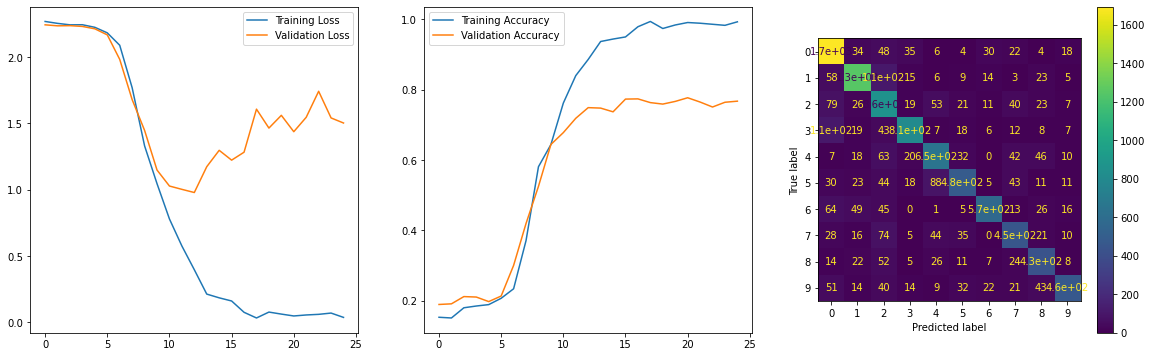

In [86]:
## Model 1: Basic VGG (3 Blocks) 
BasicVGG = basicModel()
BasicVGG.summary()
# Transpose vector datasets to train model.
x_train = numpy.transpose(x_train,[3,0,1,2])
x_test = numpy.transpose(x_test,[3,0,1,2])

# Debug Print:
print("X_train, X_test = ",x_train.shape,x_test.shape)
print("Y_train, Y_test = ",y_train.shape,y_test.shape)

BasicVGG.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
VGGhistory = BasicVGG.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_test, y_test))
BasicVGG.save("BasicVGG")
plot_training(VGGhistory, BasicVGG, x_test, y_test)



Model: "simpleVGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
spatial_dropout2d_18 (Spatia (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 8)         0 

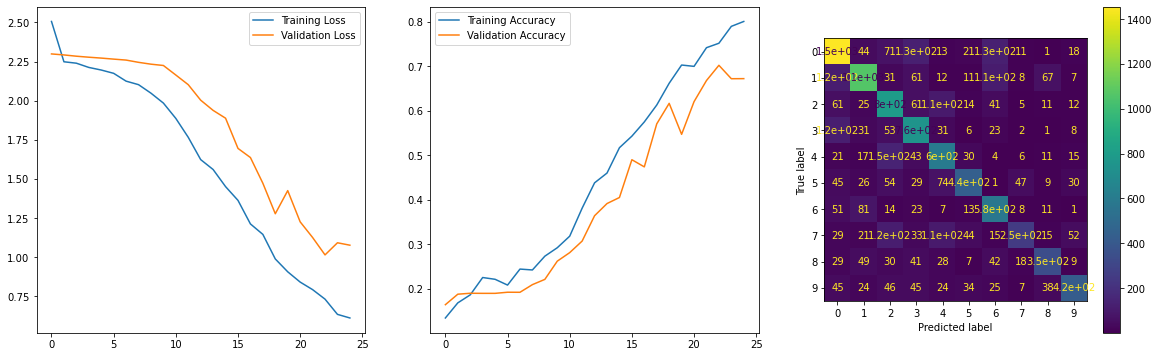

In [87]:
## Basic Model With Batch Normalisation and Spatial Dropout.
## Model 1: Basic VGG (3 Blocks) 
BasicVGG2 = basicModel2()
BasicVGG2.summary()
# Transpose vector datasets to train model.

BasicVGG2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
VGGhistory2 = BasicVGG2.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_test, y_test))
BasicVGG2.save("BasicVGG2")
plot_training(VGGhistory2, BasicVGG2, x_test, y_test)


In [88]:
## Data Augmentation

data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(factor=(-0.05,0.05)),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025))
])

AugmentedModel = keras.models.load_model("BasicVGG2")
# Remove input layer
AugmentedModel.layers.pop(0)
# create a new input
input_layer = keras.Input(shape=(32, 32, 3, ), name='img')
# pass the input to our augmenter
augmented = data_augmentation(input_layer)
# pass the augmented input to the rest of the model
output = AugmentedModel(augmented)


In [89]:
augmentedModel = keras.Model(inputs=input_layer, outputs=output, name="AugmentedBasicVGG")
augmentedModel.summary()

Model: "AugmentedBasicVGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
simpleVGG (Functional)       (None, 10)                609970    
Total params: 609,970
Trainable params: 609,858
Non-trainable params: 112
_________________________________________________________________


Epoch 1/25
20/20 [==============================] - 4s 134ms/step - loss: 2.2380 - accuracy: 0.4515 - val_loss: 1.2411 - val_accuracy: 0.6063
Epoch 2/25
20/20 [==============================] - 2s 122ms/step - loss: 1.6901 - accuracy: 0.4543 - val_loss: 1.2165 - val_accuracy: 0.6116
Epoch 3/25
20/20 [==============================] - 2s 122ms/step - loss: 1.5915 - accuracy: 0.4750 - val_loss: 1.1192 - val_accuracy: 0.6429
Epoch 4/25
20/20 [==============================] - 2s 122ms/step - loss: 1.5664 - accuracy: 0.4548 - val_loss: 1.1579 - val_accuracy: 0.6410
Epoch 5/25
20/20 [==============================] - 2s 122ms/step - loss: 1.4394 - accuracy: 0.5063 - val_loss: 1.0720 - val_accuracy: 0.6763
Epoch 6/25
20/20 [==============================] - 2s 122ms/step - loss: 1.3592 - accuracy: 0.5426 - val_loss: 1.0645 - val_accuracy: 0.6717
Epoch 7/25
20/20 [==============================] - 2s 121ms/step - loss: 1.3482 - accuracy: 0.5715 - val_loss: 1.0350 - val_accuracy: 0.6830
Epoch 

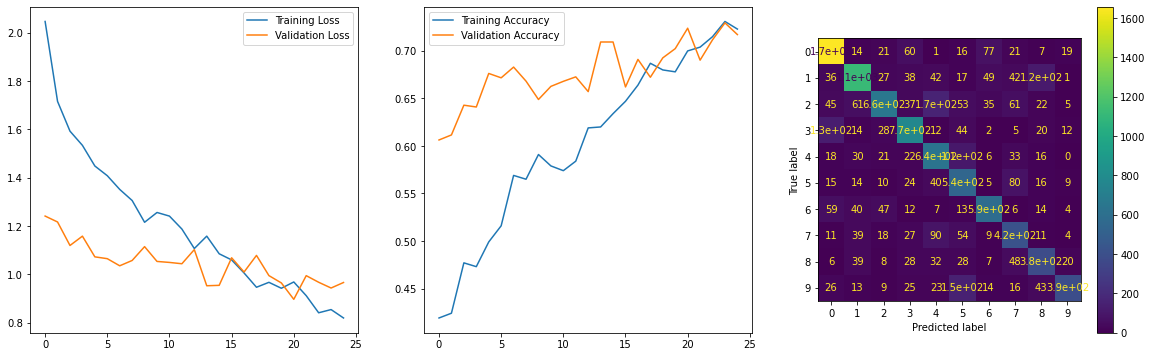

In [90]:
augmentedModel.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
AugmentedVGG = augmentedModel.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_test, y_test))
plot_training(AugmentedVGG, augmentedModel, x_test, y_test)


In [91]:
## Inital
#Using CIFAR_small (VGG Stage 3) model.
pretrained_model = keras.models.load_model('vgg_3stage_CIFAR_small.h5')
pretrained_model.summary()

OSError: SavedModel file does not exist at: vgg_3stage_CIFAR_small.h5/{saved_model.pbtxt|saved_model.pb}

Epoch 1/15
5/5 [==============================] - 4s 546ms/step - loss: 4.5560 - accuracy: 0.1000 - val_loss: 3.8155 - val_accuracy: 0.1628
Epoch 2/15
5/5 [==============================] - 2s 474ms/step - loss: 3.0514 - accuracy: 0.2163 - val_loss: 3.0265 - val_accuracy: 0.2188
Epoch 3/15
5/5 [==============================] - 2s 466ms/step - loss: 2.4288 - accuracy: 0.2848 - val_loss: 2.5823 - val_accuracy: 0.2882
Epoch 4/15
5/5 [==============================] - 2s 467ms/step - loss: 1.8292 - accuracy: 0.4128 - val_loss: 2.1865 - val_accuracy: 0.3453
Epoch 5/15
5/5 [==============================] - 2s 501ms/step - loss: 1.5452 - accuracy: 0.5017 - val_loss: 1.8723 - val_accuracy: 0.4189
Epoch 6/15
5/5 [==============================] - 2s 462ms/step - loss: 1.3966 - accuracy: 0.5478 - val_loss: 1.6511 - val_accuracy: 0.4722
Epoch 7/15
5/5 [==============================] - 2s 458ms/step - loss: 1.2191 - accuracy: 0.5987 - val_loss: 1.5276 - val_accuracy: 0.5141
Epoch 8/15
5/5 [====

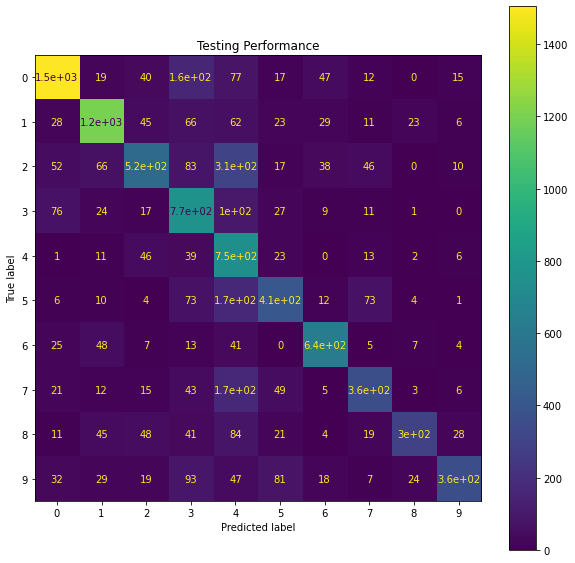

In [11]:
pretrained_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
pretrained_model.fit(x_train, y_train,
          batch_size=50,
          epochs=15,
          validation_data=(x_test, y_test))

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
pred = pretrained_model.predict(x_test)
indexes = tf.argmax(pred, axis=1)
cm = confusion_matrix(y_test, indexes)
c = ConfusionMatrixDisplay(cm, display_labels=range(10))
c.plot(ax = ax)    
ax.set_title('Testing Performance');

Model: "simple_vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
spatial_dropout2d_24 (Spatia (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 8)         0

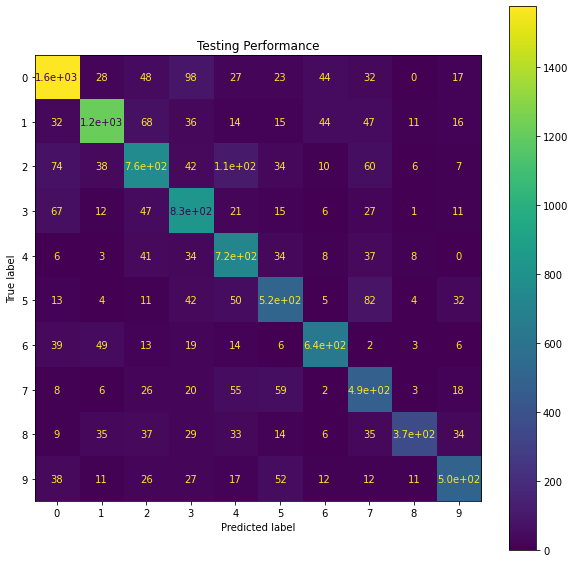

In [32]:
## Fine Tune
# Redeclare the model to fine tune.
pretrained_model = keras.models.load_model('vgg_3stage_CIFAR_small.h5')
pretrained_model.summary()

## optimizer = Adam(); Tests freezing at different layer thresholds. 
## 1 -> 78%
## 3 -> 74.6%
## 5 -> 77.21%
## 7 -> 77% ## Conv 1
## 13 -> 72.97% # Conv 1, 2
## 13 -> 72.97% # All Conv
## 18 -> 70.3% # First depth
## 23 -> 54%

# Freeze the first 7 Layers:
for layer in pretrained_model.layers[:7]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in pretrained_model.layers:
    print(layer, layer.trainable)

pretrained_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
pretrained_model.fit(x_train, y_train,
          batch_size=50,
          epochs=25,
          validation_data=(x_test, y_test))


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
pred = pretrained_model.predict(x_test);
indexes = tf.argmax(pred, axis=1)
cm = confusion_matrix(y_test, indexes)
c = ConfusionMatrixDisplay(cm, display_labels=range(10))
c.plot(ax = ax)    
ax.set_title('Testing Performance');


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000225B84F5F40> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000225B84F5E20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000225B851D3A0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000225B6D3FF40> False
<tensorflow.python.keras.layers.core.Activation object at 0x00000225B851DCA0> False
<tensorflow.python.keras.layers.core.SpatialDropout2D object at 0x00000225B851DC70> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000225CD071910> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000225B851D2B0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000225CD085070> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000225B851BEE0> True
<tensorflow.python.keras.layers.core.Activation object at 0x00000225B85076D0> True
<t

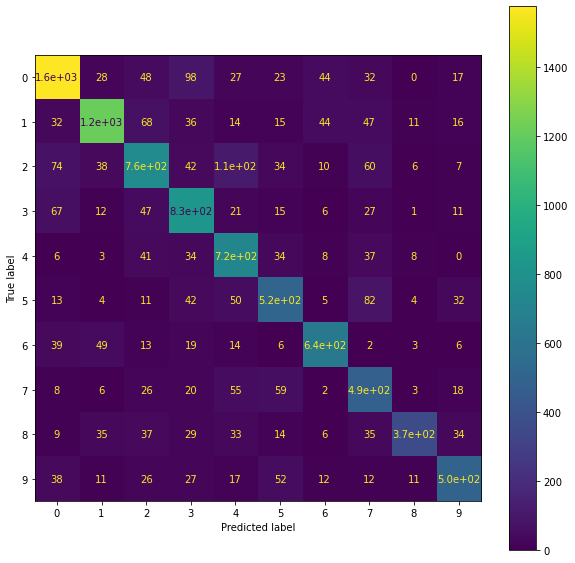

In [34]:
## Data Augmented Pretrained model
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.05),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025))
])

pretrained_model_Augmented = keras.models.load_model("vgg_3stage_CIFAR_small.h5")

# Freeze the first 7 Layers:
for layer in pretrained_model_Augmented.layers[:7]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in pretrained_model_Augmented.layers:
    print(layer, layer.trainable)

# Remove input layer
pretrained_model_Augmented.layers.pop(0)
# create a new input
input_layer = keras.Input(shape=(32, 32, 3, ), name='img')
# pass the input to our augmenter
augmented = data_augmentation(input_layer)
# pass the augmented input to the rest of the model
output = pretrained_model_Augmented(augmented)

# Redeclare the model to fine tune.
pretrained_model_Augmented = keras.Model(inputs=input_layer, outputs=output, name="AugmentedPretrainedVGG")
pretrained_model_Augmented.summary()




pretrained_model_Augmented.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
pretrained_model_Augmented.fit(x_train, y_train,
          batch_size=50,
          epochs=25,
          validation_data=(x_test, y_test))


## Evaluate

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
pred = pretrained_model.predict(x_test);
indexes = tf.argmax(pred, axis=1)
cm = confusion_matrix(y_test, indexes)
c = ConfusionMatrixDisplay(cm, display_labels=range(10))
c.plot(ax = ax)    